# Train another AI model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Load and preprocess the data

In [2]:
# load the data
data = pd.read_csv('../data/clean_data.csv')
# encode the target variable
le = LabelEncoder()
data['Spectral Class'] = le.fit_transform(data['Spectral Class'])
# normalize the data except the target variable
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
# split the data into train and test
X = data.drop(['Spectral Class'], axis=1)
y = data['Spectral Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a Decision Tree Model

Accuracy: 0.95


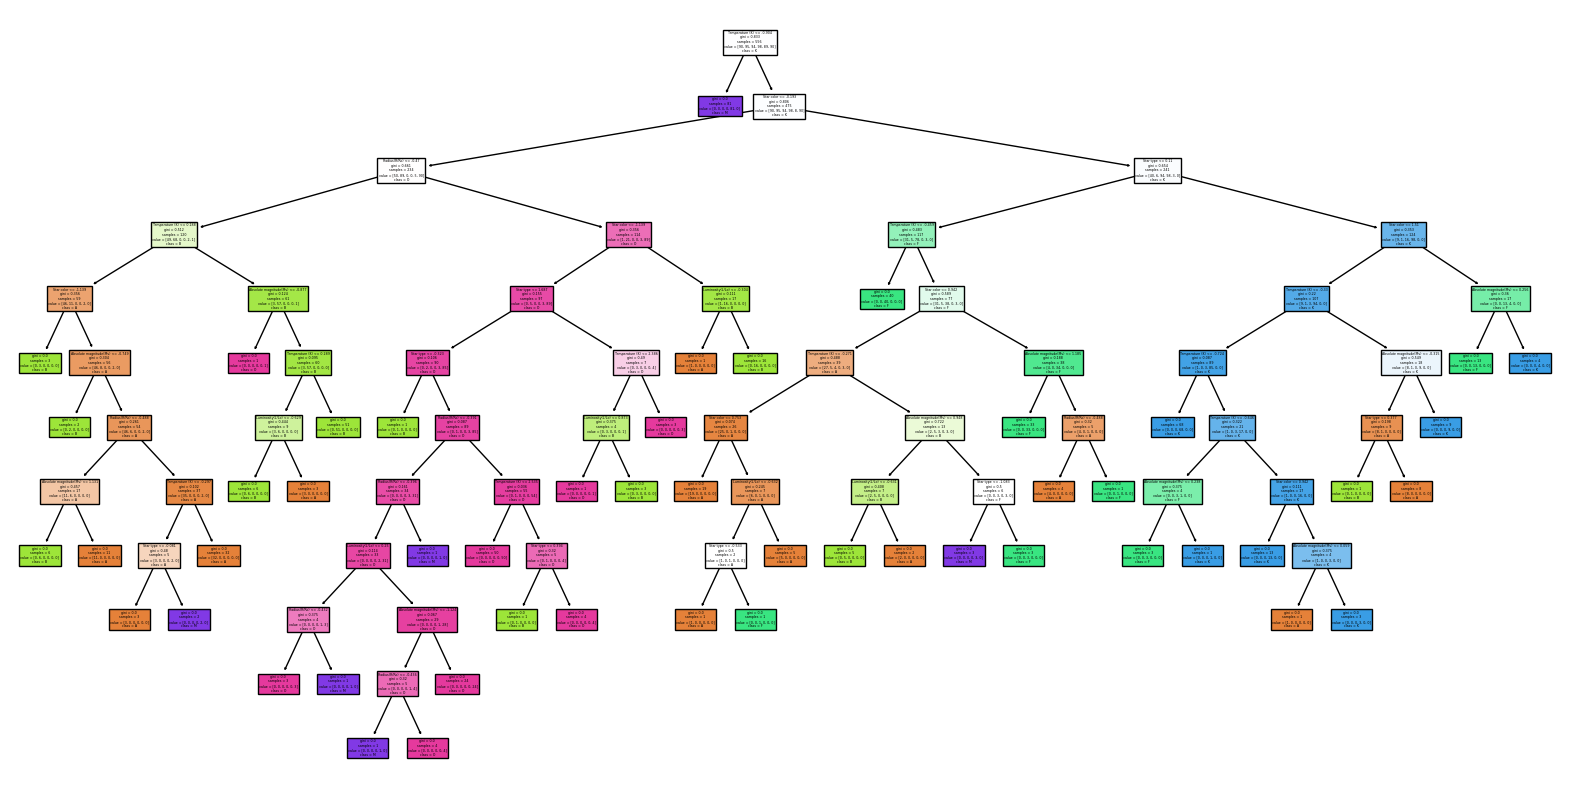

In [3]:
# create a classifier tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=data.columns[:-1].to_list(), class_names=le.classes_.tolist())
plt.savefig('../plots/tree_high_dpi', dpi=300)

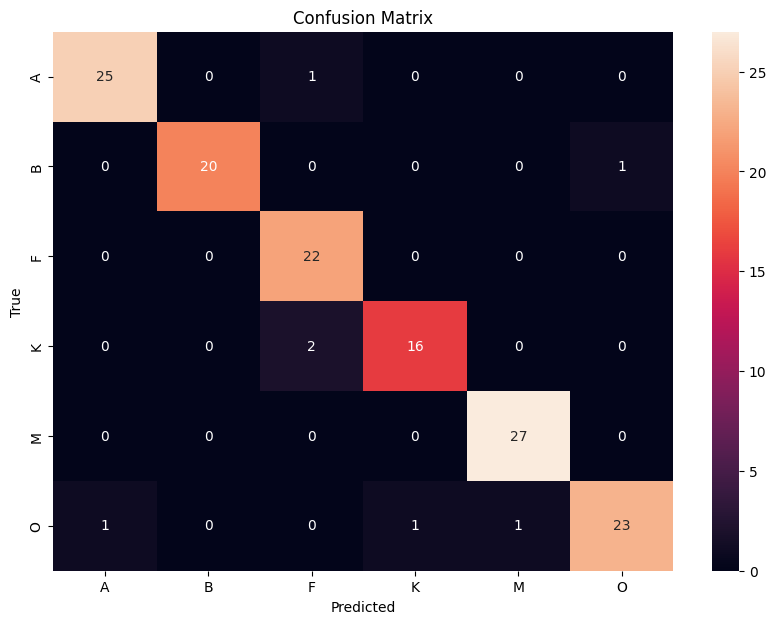

In [4]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../plots/confusion_matrix_DT', dpi=100)

### Save the Decision Tree Model

In [5]:
# save the model
import joblib
joblib.dump(clf, '../models/DecisionTree_model.pkl')

['../models/DecisionTree_model.pkl']

### Train a Neural Network Model

In [6]:
# create a neural network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(62, 62, 62), activation='relu', max_iter=1000, verbose = 1)

In [7]:
# train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Iteration 1, loss = 1.79386766
Iteration 2, loss = 1.71809074
Iteration 3, loss = 1.64826819
Iteration 4, loss = 1.58084399
Iteration 5, loss = 1.51308885
Iteration 6, loss = 1.44097622
Iteration 7, loss = 1.36921657
Iteration 8, loss = 1.29717585
Iteration 9, loss = 1.22446963
Iteration 10, loss = 1.15495160


Iteration 11, loss = 1.08513042
Iteration 12, loss = 1.02289708
Iteration 13, loss = 0.96310795
Iteration 14, loss = 0.90790560
Iteration 15, loss = 0.85826167
Iteration 16, loss = 0.81401710
Iteration 17, loss = 0.77133754
Iteration 18, loss = 0.73358147
Iteration 19, loss = 0.70019633
Iteration 20, loss = 0.67028827
Iteration 21, loss = 0.64262824
Iteration 22, loss = 0.61725702
Iteration 23, loss = 0.59399016
Iteration 24, loss = 0.57395160
Iteration 25, loss = 0.55327530
Iteration 26, loss = 0.53410078
Iteration 27, loss = 0.51818719
Iteration 28, loss = 0.50344890
Iteration 29, loss = 0.48757224
Iteration 30, loss = 0.47329116
Iteration 31, loss = 0.46190034
Iteration 32, loss = 0.44895963
Iteration 33, loss = 0.43825327
Iteration 34, loss = 0.42719598
Iteration 35, loss = 0.41601378
Iteration 36, loss = 0.40526896
Iteration 37, loss = 0.39494491
Iteration 38, loss = 0.38990380
Iteration 39, loss = 0.37789122
Iteration 40, loss = 0.37116218
Iteration 41, loss = 0.36352599
Iteratio

In [8]:
# save the trained model 
import joblib
joblib.dump(clf, '../models/NeuralNetwork_model.pkl')

['../models/NeuralNetwork_model.pkl']

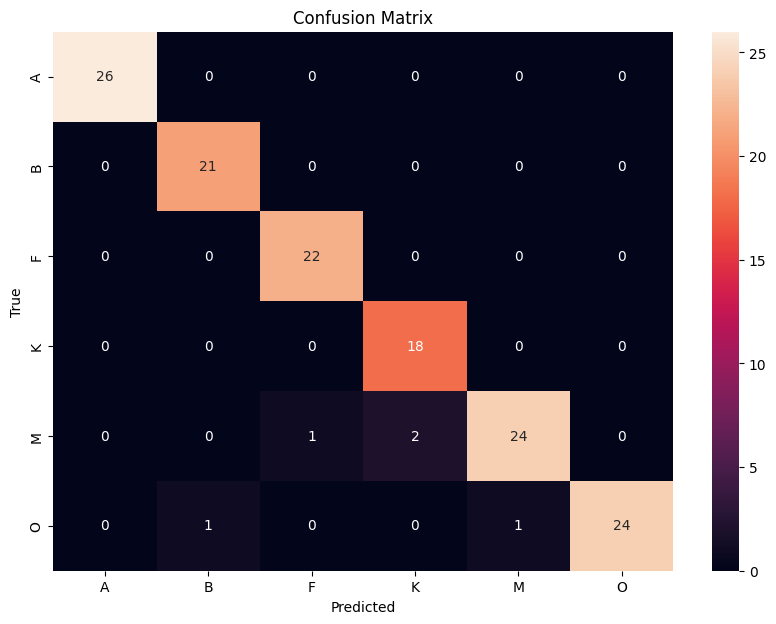

In [9]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../plots/confusion_matrix_NN', dpi=100)